### **🧠 Customer Spending Analysis using K-Means Clustering**
This notebook explores consumer spending behavior using exploratory data analysis, feature engineering, and K-Means clustering to uncover customer segments.

#### **📦 Step 1: Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For cleaner visuals
sns.set(style="whitegrid")


#### **📥 Step 2: Load Dataset**

In [2]:
df = pd.read_csv('data/consumer_spending_data.csv')


#### **🔍 Step 3: Exploratory Data Analysis (EDA)**

First few rows of the dataset:
  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceries                 Milk         1   
1   CUST_0017      Friend Activities  Dinner with Friends         2   
2   CUST_0094  Housing and Utilities           Water Bill         1   
3   CUST_0162                Fitness           Yoga Class         5   
4   CUST_0129                  Gifts              Flowers         3   

   Price Per Unit  Total Spent  Payment Method    Location Transaction Date  
0            1.28         1.28      Debit Card  Mobile App       2024-11-13  
1           74.69       149.39      Debit Card    In-store       2023-05-04  
2           76.06        76.06  Digital Wallet  Mobile App       2023-12-16  
3           11.24        56.18            Cash    In-store       2024-01-28  
4           43.71       131.12      Debit Card    In-store       2023-07-28  

Summary of the dataset:
           Quantity  Price Per Unit    Total Spen

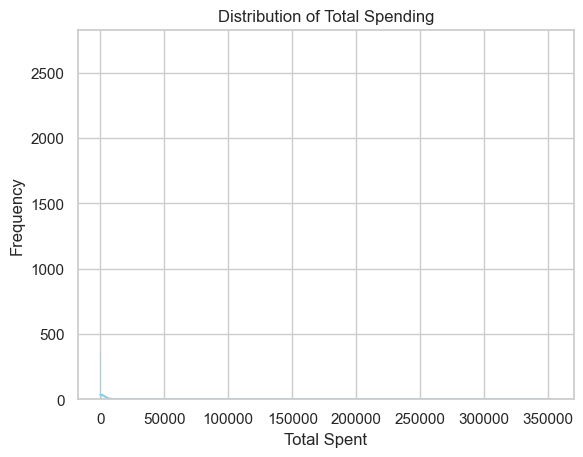

In [3]:
def perform_eda(df):
    print("First few rows of the dataset:")
    print(df.head())

    print("\nSummary of the dataset:")
    print(df.describe())

    print("\nMissing values per column:")
    print(df.isnull().sum())

    print("\nData types of columns:")
    print(df.dtypes)

    # Distribution of total spending
    sns.histplot(df['Total Spent'], kde=True, color='skyblue')
    plt.title('Distribution of Total Spending')
    plt.xlabel('Total Spent')
    plt.ylabel('Frequency')
    plt.show()

perform_eda(df)


#### **🛠️ Step 4: Feature Engineering**

In [4]:
def feature_engineering(df):
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    df['transaction_month'] = df['Transaction Date'].dt.month
    df['transaction_year'] = df['Transaction Date'].dt.year

    df['cumulative_spent'] = df.groupby('Customer ID')['Total Spent'].cumsum()
    df['average_spend'] = df.groupby('Customer ID')['Total Spent'].transform('mean')
    df['transaction_count'] = df.groupby('Customer ID')['Transaction Date'].transform('count')
    df['customer_lifetime_value'] = df.groupby('Customer ID')['Total Spent'].transform('sum')

    df['high_spend'] = df['Total Spent'].apply(lambda x: 1 if x > df['Total Spent'].mean() else 0)

feature_engineering(df)


#### **📊 Step 5: Clustering**

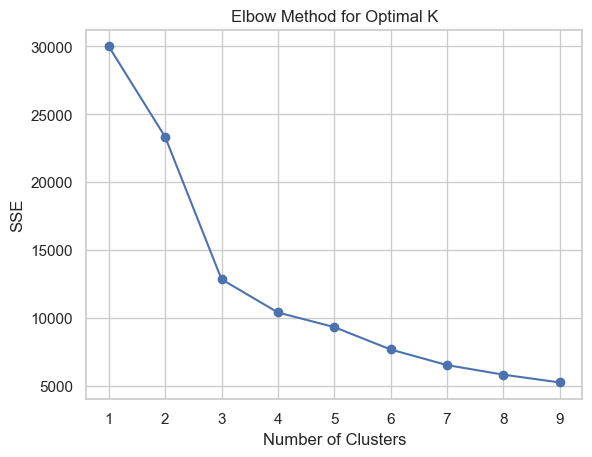

In [14]:
def perform_clustering(df):
    features = ['average_spend', 'transaction_count', 'cumulative_spent']
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])

    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(scaled_features)

perform_clustering(df)

def plot_elbow_method(df, features):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df[features])
    sse = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, 10), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal K')
    plt.show()

plot_elbow_method(df, ['average_spend', 'transaction_count', 'cumulative_spent'])



#### **📈 Step 6: Visualizations**

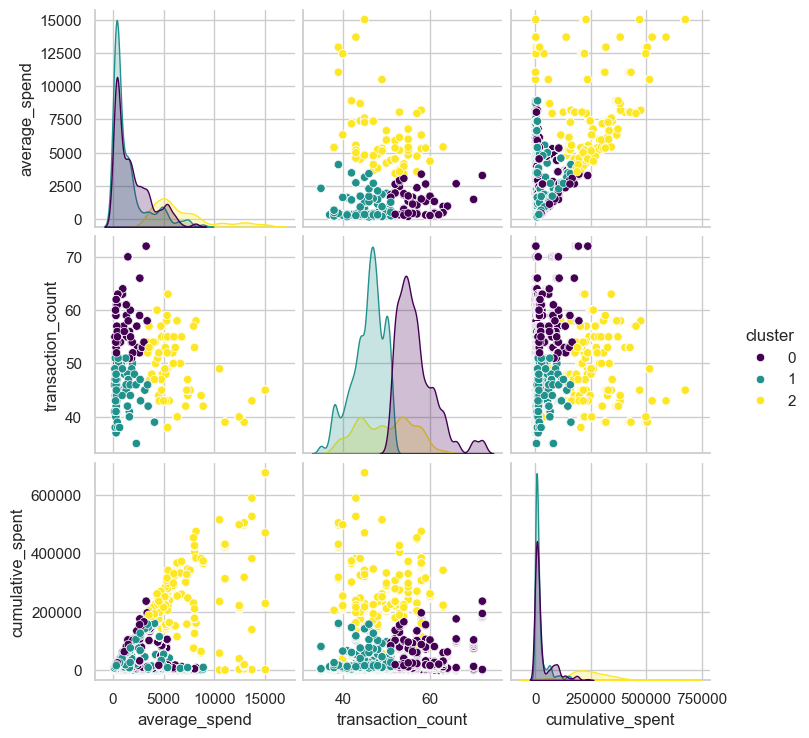

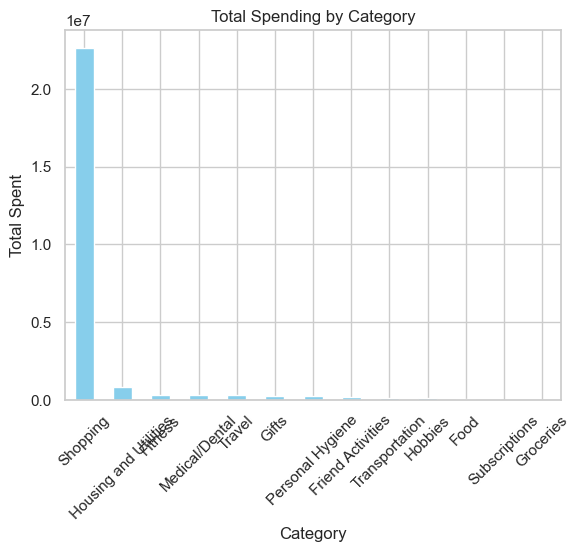

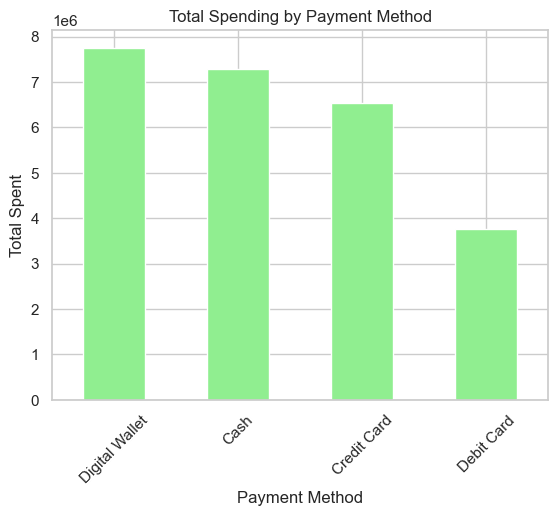

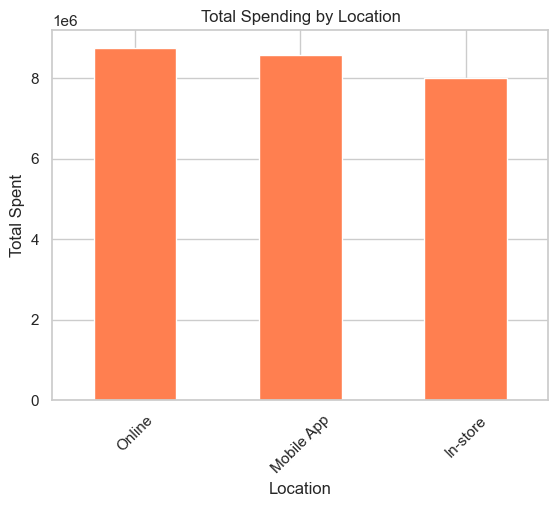

In [6]:
def visualize_data(df):
    # Cluster visualization
    sns.pairplot(df, vars=['average_spend', 'transaction_count', 'cumulative_spent'], 
                 hue='cluster', palette='viridis')
    plt.show()

    # Total spending by category
    df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Total Spending by Category')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

    # By payment method
    df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
    plt.title('Total Spending by Payment Method')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

    # By location
    df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar', color='coral')
    plt.title('Total Spending by Location')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

visualize_data(df)


#### **💸 Step 7: Cluster-Level Spending Analysis**


Average spending by cluster:
cluster
0     1158.607335
1      913.652090
2    10054.190499
Name: Total Spent, dtype: float64


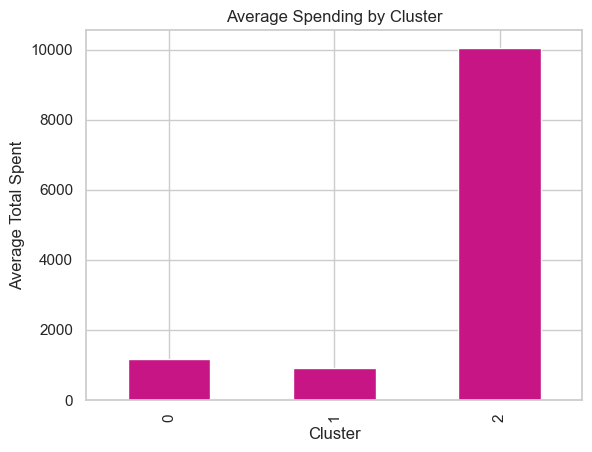

In [7]:
def analyze_cluster_spending(df):
    cluster_spending = df.groupby('cluster')['Total Spent'].mean()
    print("\nAverage spending by cluster:")
    print(cluster_spending)

    cluster_spending.plot(kind='bar', color='mediumvioletred')
    plt.title('Average Spending by Cluster')
    plt.ylabel('Average Total Spent')
    plt.xlabel('Cluster')
    plt.show()

analyze_cluster_spending(df)


#### **🎯 Step 8: Customer Segmentation**

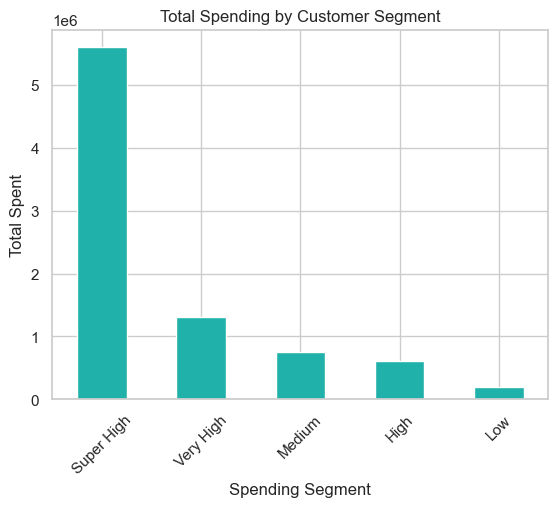

In [8]:
def segment_customers(df):
    df['Spending Segment'] = pd.cut(df['Total Spent'],
                                    bins=[0, 100, 500, 1000, 5000, 100000],
                                    labels=['Low', 'Medium', 'High', 'Very High', 'Super High'])

    spending_by_segment = df.groupby('Spending Segment', observed=False)['Total Spent'].sum().sort_values(ascending=False)

    spending_by_segment.plot(kind='bar', color='lightseagreen')
    plt.title('Total Spending by Customer Segment')
    plt.ylabel('Total Spent')
    plt.xlabel('Spending Segment')
    plt.xticks(rotation=45)
    plt.show()

segment_customers(df)


#### **RFM (Recency, Frequency, Monetary) Analysis**


Top 10 customers by RFM Score:
             Recency  Frequency   Monetary R_Score F_Score M_Score  \
Customer ID                                                          
CUST_0058          0         55  330531.09       4       4       4   
CUST_0142          1         72  236316.35       4       4       4   
CUST_0035          3         55  372688.88       4       4       4   
CUST_0191          3         57  453758.07       4       4       4   
CUST_0121          0         57  270244.24       4       4       4   
CUST_0129          4         53  274398.69       4       3       4   
CUST_0104          6         58  475648.95       3       4       4   
CUST_0161          1         51  225614.16       4       3       4   
CUST_0162          3         60  103418.59       4       4       3   
CUST_0083          0         57  134511.86       4       4       3   

            RFM_Segment  RFM_Score  
Customer ID                         
CUST_0058           444         12  
CUST_0142       

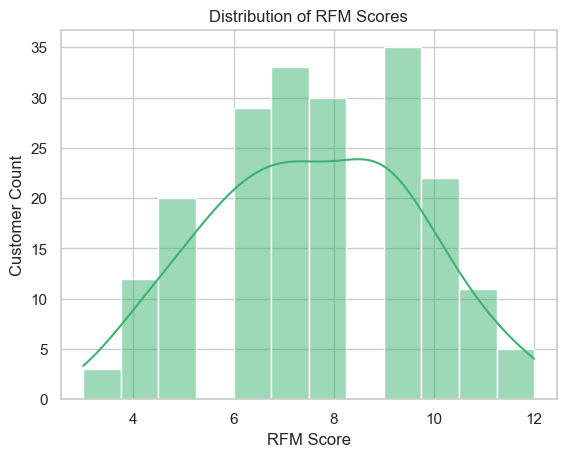

In [9]:
def perform_rfm_analysis(df):
    # Latest transaction date in dataset
    latest_date = df['Transaction Date'].max()

    # RFM Metrics per customer
    rfm = df.groupby('Customer ID').agg({
        'Transaction Date': lambda x: (latest_date - x.max()).days,  # Recency
        'Customer ID': 'count',  # Frequency
        'Total Spent': 'sum'     # Monetary
    })

    rfm.columns = ['Recency', 'Frequency', 'Monetary']

    # Segment customers using quantiles
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
    rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

    # Combine scores
    rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
    rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

    print("\nTop 10 customers by RFM Score:")
    print(rfm.sort_values(by='RFM_Score', ascending=False).head(10))

    # Add to original df
    df = df.merge(rfm[['RFM_Score']], on='Customer ID', how='left')

    # Visualize
    sns.histplot(rfm['RFM_Score'], bins=12, kde=True, color='mediumseagreen')
    plt.title('Distribution of RFM Scores')
    plt.xlabel('RFM Score')
    plt.ylabel('Customer Count')
    plt.show()

    return df

# Apply RFM
df = perform_rfm_analysis(df)


#### **Time Series Trends**

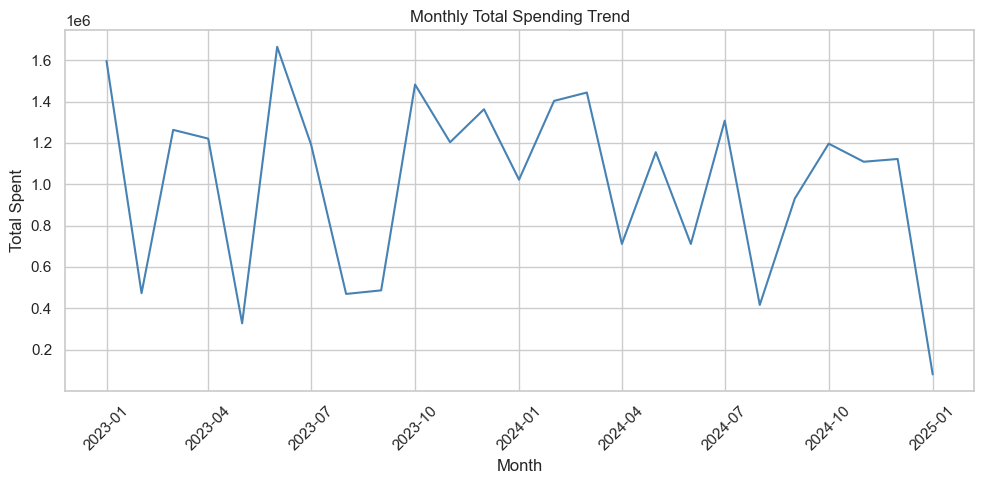

In [10]:
def plot_time_series(df):
    # Monthly spending trend
    monthly_trend = df.groupby([df['Transaction Date'].dt.to_period('M')])['Total Spent'].sum()
    monthly_trend.index = monthly_trend.index.to_timestamp()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, color='steelblue')
    plt.title('Monthly Total Spending Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot time series
plot_time_series(df)


#### **Customer Retention Analysis**

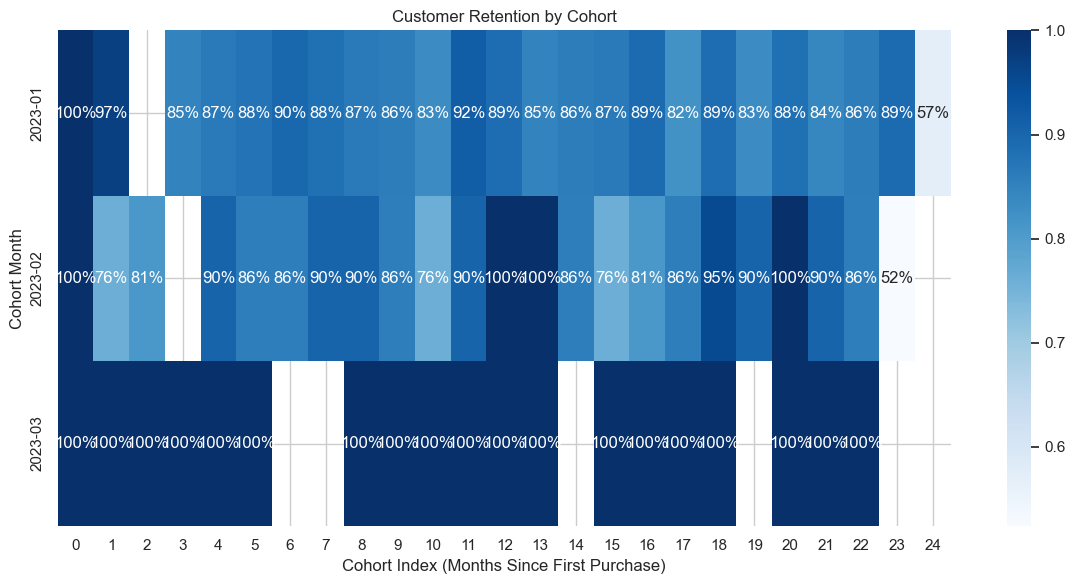

In [11]:
def customer_retention(df):
    df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
    cohort = df.groupby(['Customer ID'])['YearMonth'].min().reset_index()
    cohort.columns = ['Customer ID', 'CohortMonth']
    df = df.merge(cohort, on='Customer ID')

    df['CohortIndex'] = (df['YearMonth'].dt.to_timestamp() - df['CohortMonth'].dt.to_timestamp()).dt.days // 30

    cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().unstack(0)

    cohort_sizes = cohort_counts.iloc[0]
    retention = cohort_counts.divide(cohort_sizes, axis=1)

    plt.figure(figsize=(12, 6))
    sns.heatmap(retention.T, cmap='Blues', annot=True, fmt='.0%')
    plt.title('Customer Retention by Cohort')
    plt.xlabel('Cohort Index (Months Since First Purchase)')
    plt.ylabel('Cohort Month')
    plt.tight_layout()
    plt.show()

# Run retention analysis
customer_retention(df)


#### **Association Rule Mining (Market Basket Analysis)**

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

def market_basket_analysis(df):
    # Prepare data
    basket = df.groupby(['Customer ID', 'Transaction Date'])['Item'].apply(list).reset_index()
    transactions = basket['Item'].tolist()

    # Encode data
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    basket_df = pd.DataFrame(te_ary, columns=te.columns_)

    # Frequent itemsets
    frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

    # Association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
    rules = rules.sort_values(by='confidence', ascending=False)

    print("\nTop Association Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Run Market Basket Analysis
market_basket_analysis(df)



Top Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


#### **📌 Step 9: Results, Business Insights & Action Items**

##### **🧩 Key Insights:**
Three distinct customer clusters were identified using K-Means clustering based on spending behavior:

Cluster 0: Low-average spenders

Cluster 1: Medium-frequency, low spenders

Cluster 2: High-value, high-spending customers (top-tier)

Top spending categories include:

[Fill in once you know — e.g., Electronics, Housing, or Friend Activities]

Payment preferences showed a strong tilt toward:

[e.g., Debit Card or Digital Wallets]

Location-based analysis indicates higher spending occurs via [e.g., In-store or Mobile App channels].

##### **🎯 Customer Segmentation Observations:**

Majority of customers fall into Low to Medium spend brackets.

A smaller segment contributes to disproportionately high revenue (Pareto principle insight: focus on the top 20%).

##### **📊 RFM Analysis Takeaways:**

Identified top RFM scorers (e.g., customers with frequent, recent, and high spending).

These customers are prime targets for loyalty programs, exclusive promotions, or VIP perks.

##### **✅ Actionable Recommendations:**

1. Retarget High-Value Clusters (Cluster 2 & High RFM Scores):

Personalized campaigns, early access offers, loyalty rewards.

2. Nurture Mid-Tier Segments (Cluster 1):

Offer incentives for increased frequency and cart value.

3. Analyze Low Spenders (Cluster 0):

Investigate friction points — are prices too high? Experience lacking? Offer onboarding or entry-level deals.

4. Category-Level Promotions:

- Promote top categories in seasonal campaigns.

- Upsell frequently paired items in top categories.

5. Optimize for Preferred Payment Methods:

Enhance UX and security for most-used methods (e.g., streamline digital wallet experience).

6. RFM-Based Segmentation Campaigns:

Create tailored email marketing lists by RFM tier (e.g., high RFM gets VIP access, low RFM gets reactivation offers).